Author: Carlos Roberto de Melo

Date: 12/12/2020

Obj: Rotate grid with pPXF data. The goal is align the x-axis with the major axis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plotbin.sauron_colormap import register_sauron_colormap
from plotbin.plot_velfield import plot_velfield


from mpdaf.obj import Image

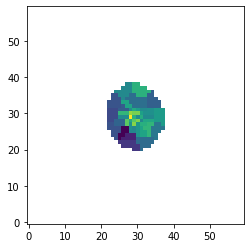

In [4]:
#Read pPXF maps with data

Vrms_map = Image("/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/Jampy/Data/RMS_Velocity_Map_IndoTemplate.fits", ext=1)
erro_rms_map = Image("/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/Jampy/Data/RMS_Velocity_Map_IndoTemplate.fits", ext=2)


Vrms_map.plot()

In [5]:
#Assuming the highest velocity in the center.

x = []   #x original position
y = []   #y original position

yc, xc = np.where(Vrms_map.data == Vrms_map.data.max()) #center position


vrms = [] #list for Vrms
erms = [] #list for error rms

In [6]:
#Buildind linear arrays

for i in range(Vrms_map.shape[0]):
    for j in range(Vrms_map.shape[1]):
        if not np.ma.core.is_masked(Vrms_map.data[i,j]):
            
            x.append(j)
            y.append(i)
            vrms.append(Vrms_map.data[i,j])
            erms.append(erro_rms_map[i,j])

In [7]:
#Transform list in arrays
x = np.array(x)
y = np.array(y)
vrms = np.array(vrms)
erms = np.array(erms)

Text(0.5, 1.0, 'Original')

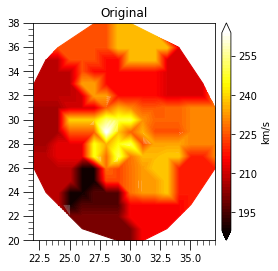

In [8]:
#Plot original data

plot_velfield(x, y, vrms,  colorbar=True, vmin=188, vmax=264, label='km/s', cmap=plt.cm.hot, nodots=True)

plt.title(r"Original")

In [9]:
#O JAM assume que a galáxia esteja com o seu semi-eixo maior sobre o eixo dos x, bem como o centro no ponto (0,0).
    #Por esse motivo vamos transladar as posições de modo que o centro seja o px com maior dispersão. E depois 
    #vamos rotacionar a galáxia para obter o semi-eixo maior sobre o eixo dos x. Como o find my galaxy retorna o
    #P.A (Position Angle) medido no sentido antihorário a partir do eixo y, precisamos rotacionar os nossos eixos
    #originais de 90°+P.A, para que o semi-eixo maior fique sobre o eixo x. No nosso caso, o P.A retornado é 67.7°

theta = 90 - 11.6         #ângulo de rotação em graus (find_my_galaxy PA: 11.6°)

#Transalação para que o centro seja o px (0,0)
x_new = x - xc
y_new = y - yc

#Rotação
x_rot = ( np.cos(theta*np.pi/180)*x_new - np.sin(theta*np.pi/180)*y_new )
y_rot = ( np.sin(theta*np.pi/180)*x_new + np.cos(theta*np.pi/180)*y_new )

In [10]:
#Esse bloco não é necessário. Ele apenas verifica se a maior dispersão após a translação se encontra na posição (0,0)
#Além disso, olhamos também para ver se essa posição é mantida após a rotação
print("     x_px   y_px   disp \t   x_new   y_new   disp \t   x_rot   y_rot   disp")

for i in range(len(vrms)):
    print("%8.2f%8.2f%8.2f\t%8.2f%8.2f%8.2f\t%8.2f%8.2f%8.2f" % (x[i],y[i], vrms[i], x_new[i],y_new[i],vrms[i],x_rot[i],y_rot[i],vrms[i]))

     x_px   y_px   disp 	   x_new   y_new   disp 	   x_rot   y_rot   disp
   29.00   20.00  200.77	    1.00   -9.00  200.77	    9.02   -0.83  200.77
   30.00   20.00  200.77	    2.00   -9.00  200.77	    9.22    0.15  200.77
   31.00   20.00  215.40	    3.00   -9.00  215.40	    9.42    1.13  215.40
   26.00   21.00  200.77	   -2.00   -8.00  200.77	    7.43   -3.57  200.77
   27.00   21.00  200.77	   -1.00   -8.00  200.77	    7.64   -2.59  200.77
   28.00   21.00  200.77	    0.00   -8.00  200.77	    7.84   -1.61  200.77
   29.00   21.00  200.77	    1.00   -8.00  200.77	    8.04   -0.63  200.77
   30.00   21.00  200.77	    2.00   -8.00  200.77	    8.24    0.35  200.77
   31.00   21.00  215.40	    3.00   -8.00  215.40	    8.44    1.33  215.40
   32.00   21.00  215.40	    4.00   -8.00  215.40	    8.64    2.31  215.40
   33.00   21.00  215.40	    5.00   -8.00  215.40	    8.84    3.29  215.40
   25.00   22.00  200.77	   -3.00   -7.00  200.77	    6.25   -4.35  200.77
   26.00   22.00  200.77	 

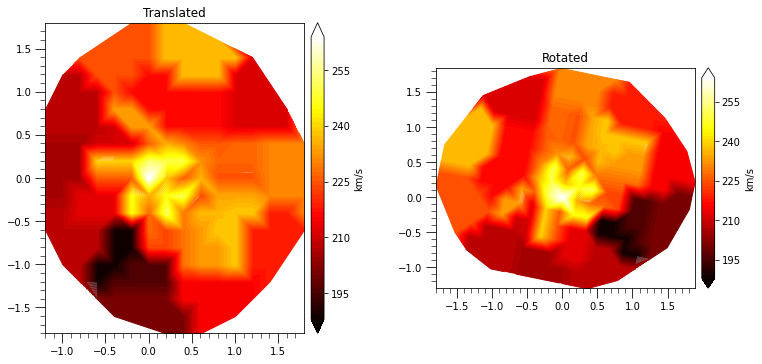

In [19]:
#Plotando o resultado da rotação e a imagem apenas transladada
plt.figure(figsize=(12,12))
plt.subplot(121)
plot_velfield(x_new*0.2, y_new*0.2, vrms, vmin=188, vmax=264, colorbar=True, label='km/s', cmap=plt.cm.hot, nodots=True)
plt.title(r"Translated")

plt.subplot(122)
plot_velfield(x_rot*0.2, y_rot*0.2, vrms, vmin=188, vmax=264, colorbar=True, label='km/s', cmap=plt.cm.hot, nodots=True)
plt.title(r"Rotated")


plt.tick_params(labelleft=True)
plt.subplots_adjust(wspace=0.4)

In [12]:
#Saving table with rotate data.

np.savetxt("pPXF_rot_data2.txt", np.column_stack([y_rot, x_rot, vrms, erms]),
           fmt=b'\t%10.6f\t %10.6f\t %10.6f\t %10.6f\t ', 
           header="\t y_rot[px] \t x_rot[px] \t Vrms[kms⁻¹] \t Erms[kms⁻¹]",  delimiter='\t')